<a href="https://colab.research.google.com/github/chrimeade/UCDPA_chrismeade/blob/main/superstore_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd

In [5]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [6]:
path = "/content/drive/MyDrive/Datasets/SampleSuperstore.csv"
sales_df = pd.read_csv(path)

In [8]:
sales_df.info

<bound method DataFrame.info of            Ship Mode    Segment        Country             City       State  \
0       Second Class   Consumer  United States        Henderson    Kentucky   
1       Second Class   Consumer  United States        Henderson    Kentucky   
2       Second Class  Corporate  United States      Los Angeles  California   
3     Standard Class   Consumer  United States  Fort Lauderdale     Florida   
4     Standard Class   Consumer  United States  Fort Lauderdale     Florida   
...              ...        ...            ...              ...         ...   
9989    Second Class   Consumer  United States            Miami     Florida   
9990  Standard Class   Consumer  United States       Costa Mesa  California   
9991  Standard Class   Consumer  United States       Costa Mesa  California   
9992  Standard Class   Consumer  United States       Costa Mesa  California   
9993    Second Class   Consumer  United States      Westminster  California   

      Postal Code R

Checking for all unique entries in each column to see if any can be removed.

In [4]:
unique_col_entries = sales_df.nunique()
print(unique_col_entries)

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64


As country only has one type, United States, and there is a large number of unique values for postal code, i will delete both of these columns as the information is not required


In [5]:
sales_df.drop(['Country', 'Postal Code'], inplace=True, axis=1)

Confirm columns removal

In [6]:
print(sales_df.columns)

Index(['Ship Mode', 'Segment', 'City', 'State', 'Region', 'Category',
       'Sub-Category', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')


In [16]:
city_count = sales_df['City'].value_counts()
print(city_count)

New York City      915
Los Angeles        747
Philadelphia       537
San Francisco      510
Seattle            428
                  ... 
Glenview             1
Missouri City        1
Rochester Hills      1
Palatine             1
Manhattan            1
Name: City, Length: 531, dtype: int64


In [17]:
state_count = sales_df['State'].value_counts()
print(state_count)

California              2001
New York                1128
Texas                    985
Pennsylvania             587
Washington               506
Illinois                 492
Ohio                     469
Florida                  383
Michigan                 255
North Carolina           249
Arizona                  224
Virginia                 224
Georgia                  184
Tennessee                183
Colorado                 182
Indiana                  149
Kentucky                 139
Massachusetts            135
New Jersey               130
Oregon                   124
Wisconsin                110
Maryland                 105
Delaware                  96
Minnesota                 89
Connecticut               82
Oklahoma                  66
Missouri                  66
Alabama                   61
Arkansas                  60
Rhode Island              56
Utah                      53
Mississippi               53
Louisiana                 42
South Carolina            42
Nevada        

visuilising sales for each state as there are too many individual cities to show on a chart

In [16]:
import matplotlib.pyplot as plt

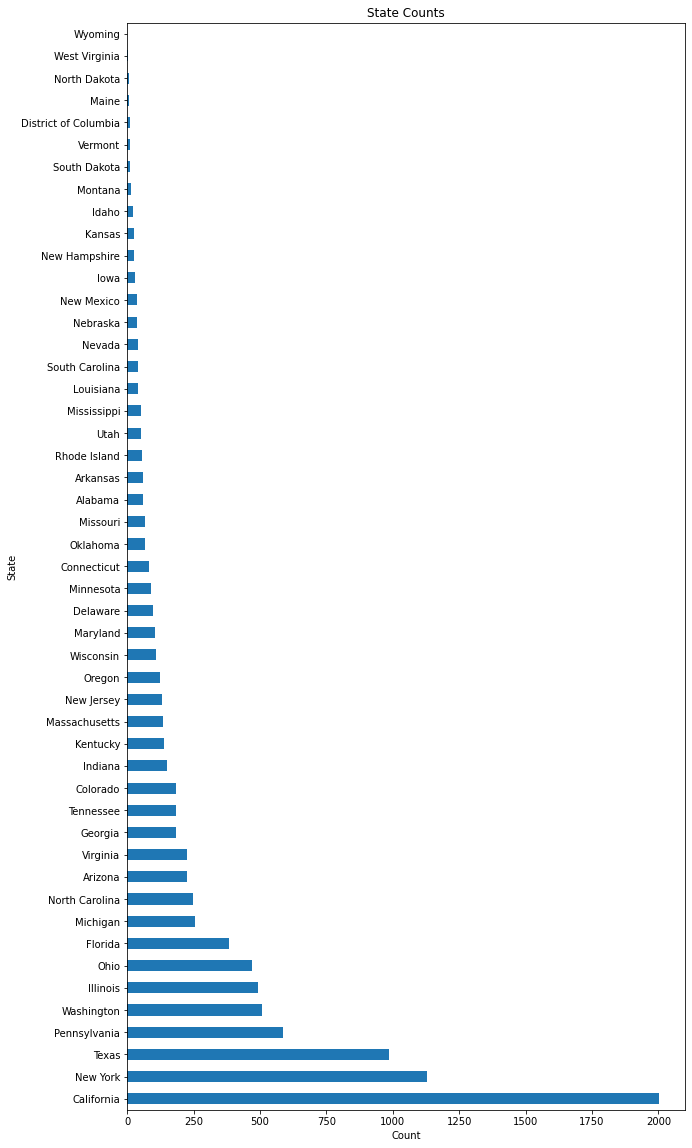

In [24]:
state_count.plot(kind='barh', figsize=(10, 20))

plt.title('State Counts')
plt.xlabel('Count')
plt.ylabel('State')

plt.show()

detail on profit column to see range in profit of each sale

In [27]:
profit_info = sales_df['Profit'].describe()
print(profit_info)

count    9994.000000
mean       28.656896
std       234.260108
min     -6599.978000
25%         1.728750
50%         8.666500
75%        29.364000
max      8399.976000
Name: Profit, dtype: float64


I would like to define all sales as "profitable" or "loss leading" as there are quite high variations between the two

In [29]:
neg_profit = sales_df.sort_values('Profit', ascending=False)
print(neg_profit)

           Ship Mode      Segment         City           State   Region  \
6826  Standard Class    Corporate    Lafayette         Indiana  Central   
8153     First Class     Consumer      Seattle      Washington     West   
4190  Standard Class     Consumer       Newark        Delaware     East   
9039  Standard Class     Consumer      Detroit        Michigan  Central   
4098  Standard Class     Consumer  Minneapolis       Minnesota  Central   
...              ...          ...          ...             ...      ...   
4991  Standard Class    Corporate      Chicago        Illinois  Central   
3011  Standard Class  Home Office   Louisville        Colorado     West   
9774  Standard Class     Consumer  San Antonio           Texas  Central   
683         Same Day    Corporate   Burlington  North Carolina    South   
7772  Standard Class     Consumer    Lancaster            Ohio     East   

             Category Sub-Category      Sales  Quantity  Discount     Profit  
6826       Technolog

In [32]:
categorize_profit = lambda x: 'loss leading' if x < 0 else 'profitable'
sales_df['Profit or Loss'] = sales_df['Profit'].apply(categorize_profit)

In [35]:
print(sales_df.head())

        Ship Mode    Segment             City       State Region  \
0    Second Class   Consumer        Henderson    Kentucky  South   
1    Second Class   Consumer        Henderson    Kentucky  South   
2    Second Class  Corporate      Los Angeles  California   West   
3  Standard Class   Consumer  Fort Lauderdale     Florida  South   
4  Standard Class   Consumer  Fort Lauderdale     Florida  South   

          Category Sub-Category     Sales  Quantity  Discount    Profit  \
0        Furniture    Bookcases  261.9600         2      0.00   41.9136   
1        Furniture       Chairs  731.9400         3      0.00  219.5820   
2  Office Supplies       Labels   14.6200         2      0.00    6.8714   
3        Furniture       Tables  957.5775         5      0.45 -383.0310   
4  Office Supplies      Storage   22.3680         2      0.20    2.5164   

  Profit or Loss  
0     profitable  
1     profitable  
2     profitable  
3   loss leading  
4     profitable  


In [36]:
profitable_count = sales_df['Profit or Loss'].value_counts()
print(profitable_count)

profitable      8123
loss leading    1871
Name: Profit or Loss, dtype: int64


In [48]:
state_group = sales_df.groupby("State")
state_average_profit_sales = state_group["Profit", "Sales"].mean()
print(state_average_profit_sales)

                          Profit        Sales
State                                        
Alabama                94.865989   319.846557
Arizona               -15.303235   157.508933
Arkansas               66.811452   194.635500
California             38.171608   228.729451
Colorado              -35.867351   176.418231
Connecticut            42.823071   163.223866
Delaware              103.930988   285.948635
District of Columbia  105.958930   286.502000
Florida                -8.875461   233.612815
Georgia                88.315453   266.825217
Idaho                  39.367767   208.689810
Illinois              -25.625787   162.939230
Indiana               123.375411   359.431946
Iowa                   39.460397   152.658667
Kansas                 34.851813   121.429583
Kentucky               80.573357   263.250000
Louisiana              52.288150   219.453095
Maine                  56.810775   158.816250
Maryland               66.963608   225.766886
Massachusetts          50.262975  

<ipython-input-48-16beb9c70969>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  state_average_profit_sales = state_group["Profit", "Sales"].mean()


In [49]:
state_profit_sum = state_group["Profit", "Sales"].sum().sort_values(by="Profit", ascending=False)
print(state_profit_sum)


                          Profit        Sales
State                                        
California            76381.3871  457687.6315
New York              74038.5486  310876.2710
Washington            33402.6517  138641.2700
Michigan              24463.1876   76269.6140
Virginia              18597.9504   70636.7200
Indiana               18382.9363   53555.3600
Georgia               16250.0433   49095.8400
Kentucky              11199.6966   36591.7500
Minnesota             10823.1874   29863.1500
Delaware               9977.3748   27451.0690
New Jersey             9772.9138   35764.3120
Wisconsin              8401.8004   32114.6100
Rhode Island           7285.6293   22627.9560
Maryland               7031.1788   23705.5230
Massachusetts          6785.5016   28634.4340
Missouri               6436.2105   22205.1500
Alabama                5786.8253   19510.6400
Oklahoma               4853.9560   19683.3900
Arkansas               4008.6871   11678.1300
Connecticut            3511.4918  

<ipython-input-49-4f65f7c0c209>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  state_profit_sum = state_group["Profit", "Sales"].sum().sort_values(by="Profit", ascending=False)


<ipython-input-54-e4fe587f74a8>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  chart.set_xticklabels(state_stats2.index,rotation=45,ha='right')


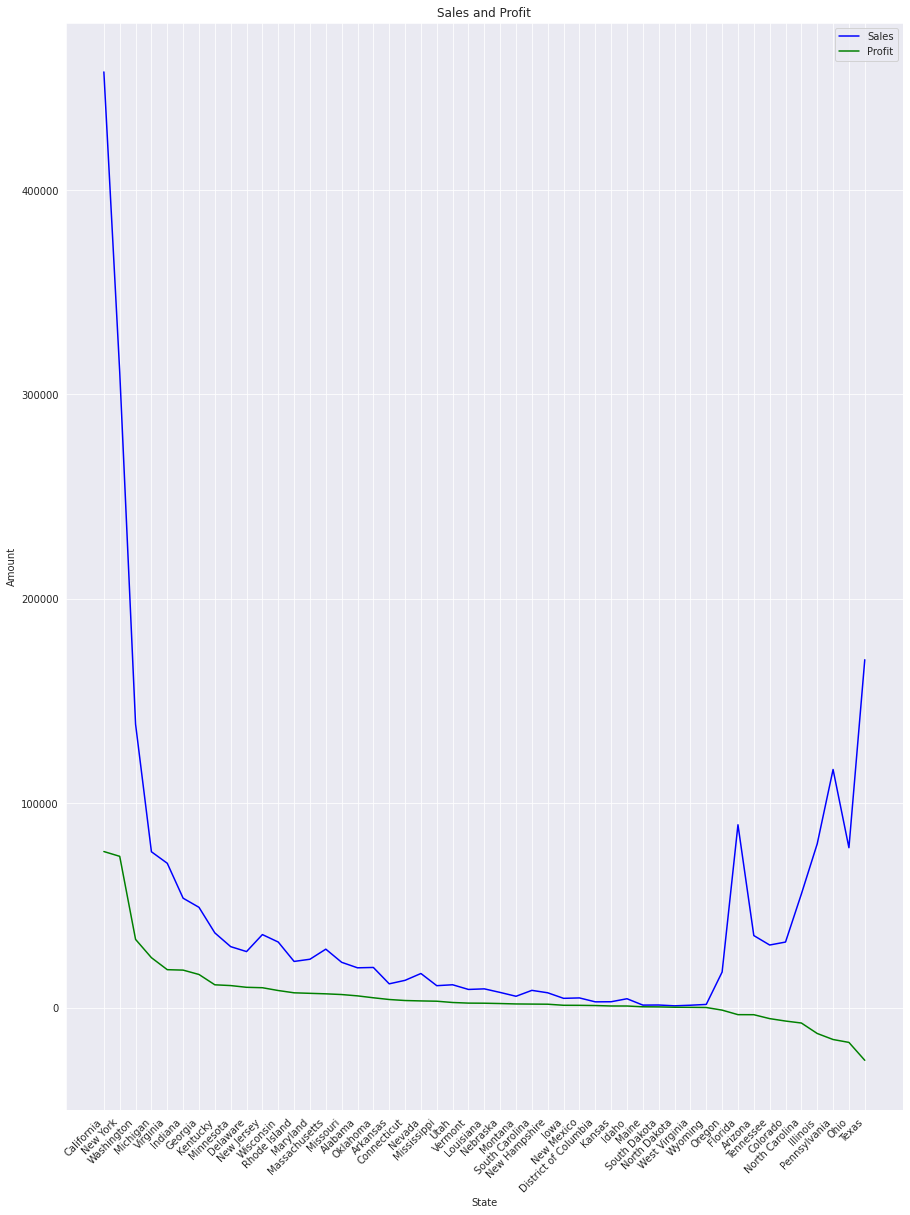

In [54]:
fig, chart = plt.subplots(figsize=(15,20))
chart.plot(state_profit_sum.index, state_profit_sum['Sales'], color='blue', label='Sales')
chart.plot(state_profit_sum.index, state_profit_sum['Profit'], color='green', label='Profit')

chart.set_xlabel('State')
chart.set_ylabel('Amount')
chart.set_title('Sales and Profit')
chart.legend()

chart.set_xticklabels(state_stats2.index,rotation=45,ha='right')

plt.show()


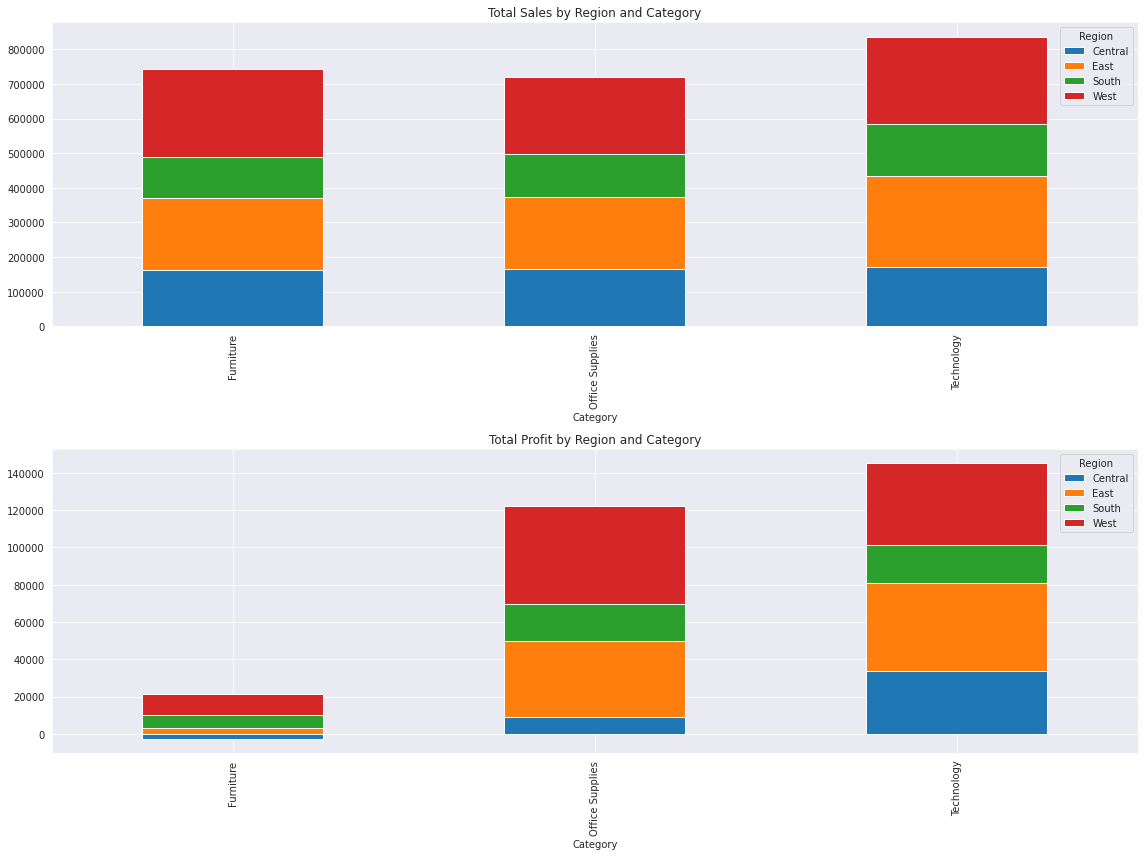

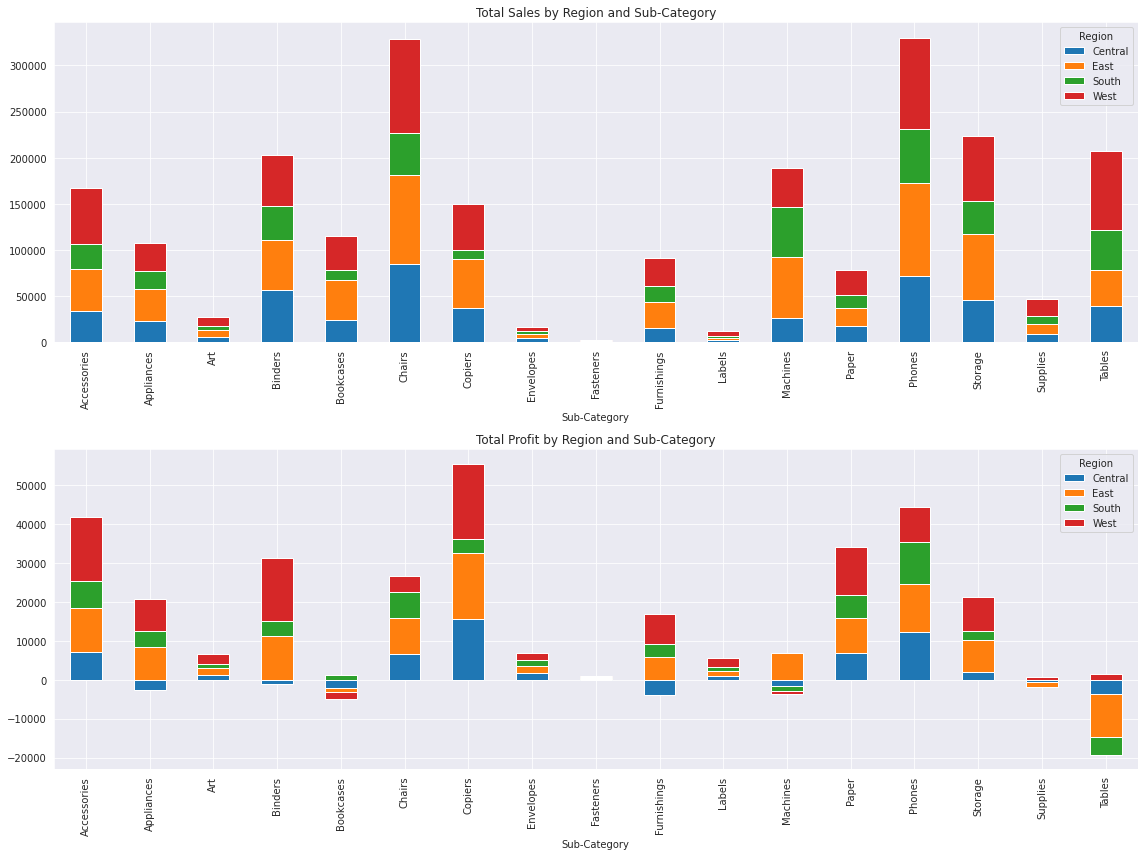

In [61]:
import matplotlib.pyplot as plt

category_region_sales = sales_df.groupby(['Category', 'Region'])['Sales'].sum()
category_region_profit = sales_df.groupby(['Category', 'Region'])['Profit'].sum()

subcat_region_sales = sales_df.groupby(['Sub-Category', 'Region'])['Sales'].sum()
subcat_region_profit = sales_df.groupby(['Sub-Category', 'Region'])['Profit'].sum()

fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(16, 12))
category_region_sales.unstack().plot(kind='bar', stacked=True, ax=ax[0], title='Total Sales by Region and Category')
category_region_profit.unstack().plot(kind='bar', stacked=True, ax=ax[1], title='Total Profit by Region and Category')
plt.tight_layout()

fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(16, 12))
subcat_region_sales.unstack().plot(kind='bar', stacked=True, ax=ax[0], title='Total Sales by Region and Sub-Category')
subcat_region_profit.unstack().plot(kind='bar', stacked=True, ax=ax[1], title='Total Profit by Region and Sub-Category')
plt.tight_layout()

plt.show()
